# Introduction
Group members- Danish Vasdev (210298) Jatin Bansal (210465)

In this project we have tried to find new types of environment models that can be used more effeciently with the I2A architecture

The basic code of I2A is from its official implementation https://github.com/higgsfield/Imagination-Augmented-Agents/tree/master?tab=readme-ov-file

Any other references used have been mentioned at the appropriate place.

# Setup helpers

In [1]:
#This code is written by @sracaniere from DeepMind
#https://github.com/sracaniere

import numpy as np
import math

STANDARD_MAP = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


def get_random_position(map_array):
  """Gets a random available position in a binary map array.

  Args:
    map_array: numpy array of the map to search an available position on.

  Returns:
    The chosen random position.

  Raises:
    ValueError: if there is no available space in the map.
  """
  if map_array.sum() <= 0:
    raise ValueError("There is no available space in the map.")
  map_dims = len(map_array.shape)
  pos = np.zeros(map_dims, dtype=np.int32)
  while True:
    result = map_array
    for i in range(map_dims):
      pos[i] = np.random.randint(map_array.shape[i])
      result = result[pos[i]]
    if result == 0:
      break
  return pos


def update_2d_pos(array_map, pos, action, pos_result):
  posv = array_map[pos[0]][pos[1]][action - 1]
  pos_result[0] = posv[0]
  pos_result[1] = posv[1]
  return pos_result


def parse_map(map_array):
  """Parses a map when there are actions: stay, right, up, left, down.

  Args:
    map_array: 2D numpy array that contains the map.

  Returns:
    A 3D numpy array (height, width, actions) that contains the resulting state
    for a given position + action, and a 2D numpy array (height, width) with the
    walls of the map.

  Raises:
    ValueError: if the map does not contain only zeros and ones.
  """
  act_def = [[0, 0], [0, 1], [-1, 0], [0, -1], [1, 0]]
  walls = np.zeros_like(map_array)
  new_map_array = []
  for i in range(map_array.shape[0]):
    new_map_array.append([])
    for j in range(map_array.shape[1]):
      new_map_array[i].append([])
      if map_array[i, j] == 0:
        for k in range(len(act_def)):
          new_map_array[i][j].append([i + act_def[k][0], j + act_def[k][1]])
      elif map_array[i, j] == 1:
        for k in range(len(act_def)):
          new_map_array[i][j].append([i, j])
        walls[i, j] = 1
      else:
        raise ValueError("Option not understood, %d" % map_array[i, j])
      for k in range(len(new_map_array[i][j])):
        if map_array[new_map_array[i][j][k][0]][new_map_array[i][j][k][1]] == 1:
          new_map_array[i][j][k][0] = i
          new_map_array[i][j][k][1] = j
  return np.array(new_map_array), walls


def observation_as_rgb(obs):
  """Reduces the 6 channels of `obs` to 3 RGB.

  Args:
    obs: the observation as a numpy array.

  Returns:
    An RGB image in the form of a numpy array, with values between 0 and 1.
  """
  height = obs.shape[0]
  width = obs.shape[1]
  rgb = np.zeros((height, width, 3), dtype=np.float32)
  for x in range(height):
    for y in range(width):
      if obs[x, y, PillEater.PILLMAN] == 1:
        rgb[x, y] = [0, 1, 0]
      elif obs[x, y, PillEater.GHOSTS] > 0. or obs[x, y, PillEater.GHOSTS_EDIBLE] > 0.:
        g = obs[x, y, PillEater.GHOSTS]
        ge = obs[x, y, PillEater.GHOSTS_EDIBLE]
        rgb[x, y] = [g + ge, ge, 0]
      elif obs[x, y, PillEater.PILL] == 1:
        rgb[x, y] = [0, 1, 1]
      elif obs[x, y, PillEater.FOOD] == 1:
        rgb[x, y] = [0, 0, 1]
      elif obs[x, y, PillEater.WALLS] == 1:
        rgb[x, y] = [1, 1, 1]
  return rgb


class PillEater(object):

  WALLS = 0
  FOOD = 1
  PILLMAN = 2
  GHOSTS = 3
  GHOSTS_EDIBLE = 4
  PILL = 5
  NUM_ACTIONS = 5
  MODES = ('regular', 'avoid', 'hunt', 'ambush', 'rush')

  def __init__(self, mode, frame_cap=3000):
    assert mode in PillEater.MODES
    self.nghosts_init = 1
    self.ghost_speed_init = 0.5
    self.ghost_speed = self.ghost_speed_init
    self.ghost_speed_increase = 0.1
    self.end_on_collect = False
    self.npills = 2
    self.pill_duration = 20
    self.seed = 123
    self.discount = 1
    self.stochasticity = 0.05
    self.obs_is_rgb = True
    self.frame_cap = frame_cap
    self.safe_distance = 5
    map_array = STANDARD_MAP
    self.map, self.walls = parse_map(map_array)
    self.map = np.array(self.map)
    self.nactions = self.map.shape[2]
    self.height = self.map.shape[0]
    self.width = self.map.shape[1]
    self.reverse_dir = (4, 5, 2, 3)
    self.dir_vec = np.array([[0, 1], [-1, 0], [0, -1], [1, 0]])
    self.world_state = dict(
        pillman=self._make_pillman(),
        ghosts=[],
        food=np.zeros(shape=(self.height, self.width), dtype=np.float32),
        pills=[None] * self.npills,
        power=0
    )
    self.nplanes = 6
    self.image = np.zeros(
        shape=(self.height, self.width, self.nplanes), dtype=np.float32)
    self.color_image = np.zeros(shape=(3, self.height, self.width),
                                dtype=np.float32)
    self.frame = 0
    self.reward = 0.
    self.pcontinue = 1.
    self._init_level(1)
    self._make_image()
    self.mode = mode
    self.timer = 0
    if self.mode == 'regular':
      self.step_reward = 0
      self.food_reward = 1
      self.big_pill_reward = 2
      self.ghost_hunt_reward = 5
      self.ghost_death_reward = 0
      self.all_pill_terminate = False
      self.all_ghosts_terminate = False
      self.all_food_terminate = True
      self.timer_terminate = -1
    elif self.mode == 'avoid':
      self.step_reward = 0.1
      self.food_reward = -0.1
      self.big_pill_reward = -5
      self.ghost_hunt_reward = -10
      self.ghost_death_reward = -20
      self.all_pill_terminate = False
      self.all_ghosts_terminate = False
      self.all_food_terminate = True
      self.timer_terminate = 128
    elif self.mode == 'hunt':
      self.step_reward = 0
      self.food_reward = 0
      self.big_pill_reward = 1
      self.ghost_hunt_reward = 10
      self.ghost_death_reward = -20
      self.all_pill_terminate = False
      self.all_ghosts_terminate = True
      self.all_food_terminate = False
      self.timer_terminate = -1
    elif self.mode == 'ambush':
      self.step_reward = 0
      self.food_reward = -0.1
      self.big_pill_reward = 0
      self.ghost_hunt_reward = 10
      self.ghost_death_reward = -20
      self.all_pill_terminate = False
      self.all_ghosts_terminate = True
      self.all_food_terminate = False
      self.timer_terminate = -1
    elif self.mode == 'rush':
      self.step_reward = 0
      self.food_reward = -0.1
      self.big_pill_reward = 10
      self.ghost_hunt_reward = 0
      self.ghost_death_reward = 0
      self.all_pill_terminate = True
      self.all_ghosts_terminate = False
      self.all_food_terminate = False
      self.timer_terminate = -1

  def _make_pillman(self):
    return self._make_actor(0)

  def _make_enemy(self):
    return self._make_actor(self.safe_distance)

  def _make_actor(self, safe_distance):
    """Creates an actor.

    An actor is a `ConfigDict` with a positions `pos` and a direction `dir`.
    The position is an array with two elements, the height and width. The
    direction is an integer representing the direction faced by the actor.

    Args:
      safe_distance: a `float`. The minimum distance from Pillman.

    Returns:
      A `ConfigDict`.
    """
    actor = {}
    if safe_distance > 0:
      occupied_map = np.copy(self.walls)

      from_ = (self.world_state['pillman']['pos'] - np.array(
          [self.safe_distance, self.safe_distance]))
      to = (self.world_state['pillman']['pos'] + np.array(
          [self.safe_distance, self.safe_distance]))
      from_[0] = max(from_[0], 1)
      from_[1] = max(from_[1], 1)
      to[0] = min(to[0], occupied_map.shape[0])
      to[1] = min(to[1], occupied_map.shape[1])

      occupied_map[from_[0]:to[0], from_[1]:to[1]] = 1

      actor['pos'] = get_random_position(occupied_map)
      actor['dir'] = np.random.randint(4)
    else:
      actor['pos'] = get_random_position(self.walls)
      actor['dir'] = np.random.randint(4)

    return actor

  def _make_pill(self):
    pill = dict(
        pos=get_random_position(self.walls)
    )
    return pill

  def _init_level(self, level):
    """Initialises the level."""
    self.level = level
    self._fill_food(self.walls, self.world_state['food'])
    self.world_state['pills'] = [self._make_pill() for _ in range(self.npills)]
    self.world_state['pillman']['pos'] = get_random_position(self.walls)

    self.nghosts = int(self.nghosts_init + math.floor((level - 1) / 2))
    self.world_state['ghosts'] = [self._make_enemy() for _ in range(self.nghosts)]
    self.world_state['power'] = 0

    self.ghost_speed = (
        self.ghost_speed_init + self.ghost_speed_increase * (level - 1))
    self.timer = 0

  def _fill_food(self, walls, food):
    food.fill(-1)
    food *= walls
    food += 1
    self.nfood = food.sum()

  def _get_food(self, posx, posy):
    self.reward += self.food_reward
    self.world_state['food'][posx][posy] = 0
    self.nfood -= 1
    if self.nfood == 0 and self.all_food_terminate:
      self._init_level(self.level + 1)

  def _get_pill(self, pill_index):
    self.world_state['pills'].pop(pill_index)
    self.reward += self.big_pill_reward
    self.world_state['power'] = self.pill_duration
    if (not self.world_state['pills']) and self.all_pill_terminate:
      self._init_level(self.level + 1)

  def _kill_ghost(self, ghost_index):
    self.world_state['ghosts'].pop(ghost_index)
    self.reward += self.ghost_hunt_reward
    if (not self.world_state['ghosts']) and self.all_ghosts_terminate:
      self._init_level(self.level + 1)

  def _die_by_ghost(self):
    self.reward += self.ghost_death_reward
    self.pcontinue = 0

  def _move_pillman(self, action):
    """Moves Pillman following the action in the proto `action_proto`."""
    action += 1  # our code is 1 based
    pos = self.world_state['pillman']['pos']
    pillman = self.world_state['pillman']
    update_2d_pos(self.map, pos, action, pos)
    if self.world_state['food'][pos[0]][pos[1]] == 1:
      self._get_food(pos[0], pos[1])
    for i, pill in enumerate(self.world_state['pills']):
      pos = pill['pos']
      if pos[0] == pillman['pos'][0] and pos[1] == pillman['pos'][1]:
        self._get_pill(i)
        break

  def _move_ghost(self, ghost):
    """Moves the given ghost."""
    pos = ghost['pos']
    new_pos = np.zeros(shape=(2,), dtype=np.float32)
    pillman = self.world_state['pillman']
    available = []
    for i in range(2, self.nactions + 1):
      update_2d_pos(self.map, pos, i, new_pos)
      if pos[0] != new_pos[0] or pos[1] != new_pos[1]:
        available.append(i)
    n_available = len(available)
    if n_available == 1:
      ghost['dir'] = available[0]
    elif n_available == 2:
      if ghost['dir'] not in available:
        if self.reverse_dir[ghost['dir'] - 2] == available[0]:
          ghost['dir'] = available[1]
        else:
          ghost['dir'] = available[0]
    else:
      rev_dir = self.reverse_dir[ghost['dir'] - 2]
      for i in range(n_available):
        if available[i] == rev_dir:
          available.pop(i)
          n_available -= 1
          break
      prods = np.zeros(n_available, dtype=np.float32)
      x = np.array(
          [pillman['pos'][0] - pos[0], pillman['pos'][1] - pos[1]], dtype=np.float32)
      norm = np.linalg.norm(x)
      if norm > 0:
        x *= 1. / norm
        for i in range(n_available):
          prods[i] = np.dot(x, self.dir_vec[available[i] - 2])
        if self.world_state['power'] == 0:
          if self.stochasticity > np.random.uniform():
            j = np.random.randint(n_available)
          else:
            # move towards pillman:
            j = np.argmax(prods)
        else:
          # run away from pillman:
          j = np.argmin(prods)
        ghost['dir'] = available[j]
    update_2d_pos(self.map, pos, ghost['dir'], pos)

  def _make_image(self):
    """Represents world in a `height x width x 6` `Tensor`."""
    self.image.fill(0)
    self.image[:, :, PillEater.WALLS] = self.walls
    self.image[:, :, PillEater.FOOD] = self.world_state['food']
    self.image[self.world_state['pillman']['pos'][0], self.world_state['pillman']['pos'][1],
               PillEater.PILLMAN] = 1
    for ghost in self.world_state['ghosts']:
      edibility = self.world_state['power'] / float(self.pill_duration)
      self.image[ghost['pos'][0], ghost['pos'][1], PillEater.GHOSTS] = 1. - edibility
      self.image[ghost['pos'][0], ghost['pos'][1], PillEater.GHOSTS_EDIBLE] = edibility
    for pill in self.world_state['pills']:
      self.image[pill['pos'][0], pill['pos'][1], PillEater.PILL] = 1
    return self.image

  def start(self):
    """Starts a new episode."""
    self.frame = 0
    self._init_level(1)
    self.reward = 0
    self.pcontinue = 1
    self.ghost_speed = self.ghost_speed_init
    return self._make_image(), self.reward, self.pcontinue

  def step(self, action):
    """Advances environment one time-step following the given action."""
    self.frame += 1
    pillman = self.world_state['pillman']
    self.pcontinue = self.discount
    self.reward = self.step_reward
    self.timer += 1
    # Update world state
    self.world_state['power'] = max(0, self.world_state['power']-1)

    # move pillman
    self._move_pillman(action)

    for i, ghost in enumerate(self.world_state['ghosts']):
      # first check if pillman went onto a ghost
      pos = ghost['pos']
      if pos[0] == pillman['pos'][0] and pos[1] == pillman['pos'][1]:
        if self.world_state['power'] == 0:
          self._die_by_ghost()
        else:
          self._kill_ghost(i)
          break
      # Then move ghosts
      speed = self.ghost_speed
      if self.world_state['power'] != 0:
        speed *= 0.5
      if np.random.uniform() < speed:
        self._move_ghost(ghost)
        pos = ghost['pos']
        # check if ghost went onto pillman
        if pos[0] == pillman['pos'][0] and pos[1] == pillman['pos'][1]:
          if self.world_state['power'] == 0:
            self._die_by_ghost()
          else:
            self._kill_ghost(i)
            # assume you can only eat one ghost per turn:
            break
    self._make_image()

    # Check if level over
    if self.timer == self.timer_terminate:
      self._init_level(self.level + 1)

    # Check if framecap reached
    if self.frame_cap > 0 and self.frame >= self.frame_cap:
      self.pcontinue = 0

  def observation(self, agent_id=0):
    return (self.reward,
            self.pcontinue,
            observation_as_rgb(self.image))

In [2]:
#This code is from openai baseline
#https://github.com/openai/baselines/tree/master/baselines/common/vec_env

import numpy as np
from multiprocessing import Process, Pipe

def worker(remote, parent_remote, env_fn_wrapper):
    parent_remote.close()
    env = env_fn_wrapper.x()
    while True:
        cmd, data = remote.recv()
        if cmd == 'step':
            ob, reward, done, info = env.step(data)
            if done:
                ob = env.reset()
            remote.send((ob, reward, done, info))
        elif cmd == 'reset':
            ob = env.reset()
            remote.send(ob)
        elif cmd == 'reset_task':
            ob = env.reset_task()
            remote.send(ob)
        elif cmd == 'close':
            remote.close()
            break
        elif cmd == 'get_spaces':
            remote.send((env.observation_space, env.action_space))
        else:
            raise NotImplementedError

class VecEnv(object):
    """
    An abstract asynchronous, vectorized environment.
    """
    def __init__(self, num_envs, observation_space, action_space):
        self.num_envs = num_envs
        self.observation_space = observation_space
        self.action_space = action_space

    def reset(self):
        """
        Reset all the environments and return an array of
        observations, or a tuple of observation arrays.
        If step_async is still doing work, that work will
        be cancelled and step_wait() should not be called
        until step_async() is invoked again.
        """
        pass

    def step_async(self, actions):
        """
        Tell all the environments to start taking a step
        with the given actions.
        Call step_wait() to get the results of the step.
        You should not call this if a step_async run is
        already pending.
        """
        pass

    def step_wait(self):
        """
        Wait for the step taken with step_async().
        Returns (obs, rews, dones, infos):
         - obs: an array of observations, or a tuple of
                arrays of observations.
         - rews: an array of rewards
         - dones: an array of "episode done" booleans
         - infos: a sequence of info objects
        """
        pass

    def close(self):
        """
        Clean up the environments' resources.
        """
        pass

    def step(self, actions):
        self.step_async(actions)
        return self.step_wait()


class CloudpickleWrapper(object):
    """
    Uses cloudpickle to serialize contents (otherwise multiprocessing tries to use pickle)
    """
    def __init__(self, x):
        self.x = x
    def __getstate__(self):
        import cloudpickle
        return cloudpickle.dumps(self.x)
    def __setstate__(self, ob):
        import pickle
        self.x = pickle.loads(ob)

class SubprocVecEnv(VecEnv):
    def __init__(self, env_fns, spaces=None):
        """
        envs: list of gym environments to run in subprocesses
        """
        self.waiting = False
        self.closed = False
        nenvs = len(env_fns)
        self.nenvs = nenvs
        self.remotes, self.work_remotes = zip(*[Pipe() for _ in range(nenvs)])
        self.ps = [Process(target=worker, args=(work_remote, remote, CloudpickleWrapper(env_fn)))
            for (work_remote, remote, env_fn) in zip(self.work_remotes, self.remotes, env_fns)]
        for p in self.ps:
            p.daemon = True # if the main process crashes, we should not cause things to hang
            p.start()
        for remote in self.work_remotes:
            remote.close()

        self.remotes[0].send(('get_spaces', None))
        observation_space, action_space = self.remotes[0].recv()
        VecEnv.__init__(self, len(env_fns), observation_space, action_space)

    def step_async(self, actions):
        for remote, action in zip(self.remotes, actions):
            remote.send(('step', action))
        self.waiting = True

    def step_wait(self):
        results = [remote.recv() for remote in self.remotes]
        self.waiting = False
        obs, rews, dones, infos = zip(*results)
        return np.stack(obs), np.stack(rews), np.stack(dones), infos

    def reset(self):
        for remote in self.remotes:
            remote.send(('reset', None))
        return np.stack([remote.recv() for remote in self.remotes])

    def reset_task(self):
        for remote in self.remotes:
            remote.send(('reset_task', None))
        return np.stack([remote.recv() for remote in self.remotes])

    def close(self):
        if self.closed:
            return
        if self.waiting:
            for remote in self.remotes:
                remote.recv()
        for remote in self.remotes:
            remote.send(('close', None))
        for p in self.ps:
            p.join()
            self.closed = True

    def __len__(self):
        return self.nenvs

# MiniPacman

In [3]:
!pip install gym


In [4]:
import gym
from gym import spaces


class MiniPacman:
    def __init__(self, mode, frame_cap):
        self.mode      = mode
        self.frame_cap = frame_cap

        self.env = PillEater(mode=mode, frame_cap=frame_cap)

        self.action_space      = spaces.Discrete(5)
        self.observation_space = spaces.Box(low=0, high=1.0, shape=(3, 15, 19))

    def step(self, action):
        self.env.step(action)
        env_reward, env_pcontinue, env_frame = self.env.observation()
        self.done = env_pcontinue != 1
        env_frame = env_frame.transpose(2, 0, 1)
        return env_frame, env_reward, self.done, {}

    def reset(self):
        image, _, _ = self.env.start()
        image = observation_as_rgb(image)
        self.done = False
        image = image.transpose(2, 0, 1)
        return image

# Environment model

This is the environment model originally used in the research paper. It is an auto regressive model that uses RNNs to capture the time dependent behaviour of the environment.



In [5]:
!pip install torch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_shape, n1, n2, n3):
        super(BasicBlock, self).__init__()

        self.in_shape = in_shape
        self.n1 = n1
        self.n2 = n2
        self.n3 = n3

        self.maxpool = nn.MaxPool2d(kernel_size=in_shape[1:])
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_shape[0] * 2, n1, kernel_size=1, stride=2, padding=6),
            nn.ReLU(),
            nn.Conv2d(n1, n1, kernel_size=10, stride=1, padding=(5, 6)),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_shape[0] * 2, n2, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(n2, n2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(n1 + n2,  n3, kernel_size=1),
            nn.ReLU()
        )

    def forward(self, inputs):
        x = self.pool_and_inject(inputs)
        x = torch.cat([self.conv1(x), self.conv2(x)], 1)
        x = self.conv3(x)
        x = torch.cat([x, inputs], 1)
        return x

    def pool_and_inject(self, x):
        pooled     = self.maxpool(x)
        tiled      = pooled.expand((x.size(0),) + self.in_shape)
        out        = torch.cat([tiled, x], 1)
        return out


class EnvModel(nn.Module):
    def __init__(self, in_shape, num_pixels, num_rewards):
        super(EnvModel, self).__init__()

        width  = in_shape[1]
        height = in_shape[2]

        self.conv = nn.Sequential(
            nn.Conv2d(8, 64, kernel_size=1),
            nn.ReLU()
        )

        self.basic_block1 = BasicBlock((64, width, height), 16, 32, 64)
        self.basic_block2 = BasicBlock((128, width, height), 16, 32, 64)

        self.image_conv = nn.Sequential(
            nn.Conv2d(192, 256, kernel_size=1),
            nn.ReLU()
        )
        self.image_fc = nn.Linear(256, num_pixels)

        self.reward_conv = nn.Sequential(
            nn.Conv2d(192, 64, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=1),
            nn.ReLU()
        )
        self.reward_fc    = nn.Linear(64 * width * height, num_rewards)

    def forward(self, inputs):
        batch_size = inputs.size(0)

        x = self.conv(inputs)
        x = self.basic_block1(x)
        x = self.basic_block2(x)

        image = self.image_conv(x)
        image = image.permute(0, 2, 3, 1).contiguous().view(-1, 256)
        image = self.image_fc(image)

        reward = self.reward_conv(x)
        reward = reward.view(batch_size, -1)
        reward = self.reward_fc(reward)

        return image, reward

# The Actor Critic
We use a simple model free actor critic model to make the model free path of the I2A agent, as well as to train the environment model against

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

class OnPolicy(nn.Module):
    def __init__(self):
        super(OnPolicy, self).__init__()

    def forward(self, x):
        raise NotImplementedError

    def act(self, x, deterministic=False):
        logit, value = self.forward(x)
        probs = F.softmax(logit)

        if deterministic:
            action = probs.max(1)[1]
        else:
            action = probs.multinomial()

        return action

    def evaluate_actions(self, x, action):
        logit, value = self.forward(x)

        probs     = F.softmax(logit)
        log_probs = F.log_softmax(logit)

        action_log_probs = log_probs.gather(1, action)
        entropy = -(probs * log_probs).sum(1).mean()

        return logit, action_log_probs, value, entropy


class ActorCritic(OnPolicy):
    def __init__(self, in_shape, num_actions):
        super(ActorCritic, self).__init__()

        self.in_shape = in_shape

        self.features = nn.Sequential(
            nn.Conv2d(in_shape[0], 16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=2),
            nn.ReLU(),
        )

        self.fc = nn.Sequential(
            nn.Linear(self.feature_size(), 256),
            nn.ReLU(),
        )

        self.critic  = nn.Linear(256, 1)
        self.actor   = nn.Linear(256, num_actions)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        logit = self.actor(x)
        value = self.critic(x)
        return logit, value

    def feature_size(self):
        return self.features(Variable(torch.zeros(1, *self.in_shape))).view(1, -1).size(1)


class RolloutStorage(object):
    def __init__(self, num_steps, num_envs, state_shape):
        self.num_steps = num_steps
        self.num_envs  = num_envs
        self.states  = torch.zeros(num_steps + 1, num_envs, *state_shape)
        self.rewards = torch.zeros(num_steps,     num_envs, 1)
        self.masks   = torch.ones(num_steps  + 1, num_envs, 1)
        self.actions = torch.zeros(num_steps,     num_envs, 1).long()
        self.use_cuda = False

    def cuda(self):
        self.use_cuda  = True
        self.states    = self.states.cuda()
        self.rewards   = self.rewards.cuda()
        self.masks     = self.masks.cuda()
        self.actions   = self.actions.cuda()

    def insert(self, step, state, action, reward, mask):
        self.states[step + 1].copy_(state)
        self.actions[step].copy_(action)
        self.rewards[step].copy_(reward)
        self.masks[step + 1].copy_(mask)

    def after_update(self):
        self.states[0].copy_(self.states[-1])
        self.masks[0].copy_(self.masks[-1])

    def compute_returns(self, next_value, gamma):
        returns   = torch.zeros(self.num_steps + 1, self.num_envs, 1)
        if self.use_cuda:
            returns = returns.cuda()
        returns[-1] = next_value
        for step in reversed(range(self.num_steps)):
            returns[step] = returns[step + 1] * gamma * self.masks[step + 1] + self.rewards[step]
        return returns[:-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# MiniPacman experiment

In [8]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def displayImage(image, step, reward):
    s = "step" + str(step) + " reward " + str(reward)
    plt.title(s)
    plt.imshow(image)
    plt.show()

In [10]:
keys = {
    'w': 2,
    'd': 1,
    'a': 3,
    's': 4,
    ' ': 0
}

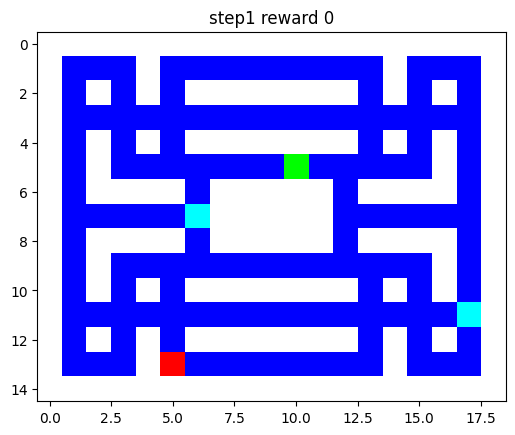

KeyboardInterrupt: Interrupted by user

In [11]:
MODES = ('regular', 'avoid', 'hunt', 'ambush', 'rush')
frame_cap = 1000

mode = 'rush'

env = MiniPacman(mode, 1000)

state = env.reset()
done = False

total_reward = 0
step = 1

displayImage(state.transpose(1, 2, 0), step, total_reward)

while not done:
    x = input()
    clear_output()
    try:
        keys[x]
    except:
        print("Only 'w' 'a' 'd' 's'")
        continue
    action = keys[x]

    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    displayImage(next_state.transpose(1, 2, 0), step, total_reward)
    step += 1

# Actor Critic on MiniPacman

In [25]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.autograd as autograd

In [26]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

In [28]:
class OnPolicy(nn.Module):
    def __init__(self):
        super(OnPolicy, self).__init__()

    def forward(self, x):
        raise NotImplementedError

    def act(self, x, deterministic=False):
        logit, value = self.forward(x)
        probs = F.softmax(logit)

        if deterministic:
            action = probs.max(1)[1]
        else:
            action = probs.multinomial(num_samples=1)

        return action

    def evaluate_actions(self, x, action):
        logit, value = self.forward(x)

        probs     = F.softmax(logit)
        log_probs = F.log_softmax(logit)

        action_log_probs = log_probs.gather(1, action)
        entropy = -(probs * log_probs).sum(1).mean()

        return logit, action_log_probs, value, entropy

In [29]:
class ActorCritic(OnPolicy):
    def __init__(self, in_shape, num_actions):
        super(ActorCritic, self).__init__()

        self.in_shape = in_shape

        self.features = nn.Sequential(
            nn.Conv2d(in_shape[0], 16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=2),
            nn.ReLU(),
        )

        self.fc = nn.Sequential(
            nn.Linear(self.feature_size(), 256),
            nn.ReLU(),
        )

        self.critic  = nn.Linear(256, 1)
        self.actor   = nn.Linear(256, num_actions)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        logit = self.actor(x)
        value = self.critic(x)
        return logit, value

    def feature_size(self):
        return self.features(autograd.Variable(torch.zeros(1, *self.in_shape))).view(1, -1).size(1)

In [30]:
class RolloutStorage(object):
    def __init__(self, num_steps, num_envs, state_shape):
        self.num_steps = num_steps
        self.num_envs  = num_envs
        self.states  = torch.zeros(num_steps + 1, num_envs, *state_shape)
        self.rewards = torch.zeros(num_steps,     num_envs, 1)
        self.masks   = torch.ones(num_steps  + 1, num_envs, 1)
        self.actions = torch.zeros(num_steps,     num_envs, 1).long()
        self.use_cuda = False

    def cuda(self):
        self.use_cuda  = True
        self.states    = self.states.cuda()
        self.rewards   = self.rewards.cuda()
        self.masks     = self.masks.cuda()
        self.actions   = self.actions.cuda()

    def insert(self, step, state, action, reward, mask):
        self.states[step + 1].copy_(state)
        self.actions[step].copy_(action)
        self.rewards[step].copy_(reward)
        self.masks[step + 1].copy_(mask)

    def after_update(self):
        self.states[0].copy_(self.states[-1])
        self.masks[0].copy_(self.masks[-1])

    def compute_returns(self, next_value, gamma):
        returns   = torch.zeros(self.num_steps + 1, self.num_envs, 1)
        if self.use_cuda:
            returns = returns.cuda()
        returns[-1] = next_value
        for step in reversed(range(self.num_steps)):
            returns[step] = returns[step + 1] * gamma * self.masks[step + 1] + self.rewards[step]
        return returns[:-1]

In [31]:
mode = "regular"
num_envs = 16

def make_env():
    def _thunk():
        env = MiniPacman(mode, 1000)
        return env

    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)

state_shape = envs.observation_space.shape

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [32]:
#a2c hyperparams:
gamma = 0.99
entropy_coef = 0.01
value_loss_coef = 0.5
max_grad_norm = 0.5
num_steps = 5
num_frames = int(10e2)

#rmsprop hyperparams:
lr    = 7e-4
eps   = 1e-5
alpha = 0.99

#Init a2c and rmsprop
actor_critic = ActorCritic(envs.observation_space.shape, envs.action_space.n)
optimizer = optim.RMSprop(actor_critic.parameters(), lr, eps=eps, alpha=alpha)

if USE_CUDA:
    actor_critic = actor_critic.cuda()

In [33]:
rollout = RolloutStorage(num_steps, num_envs, envs.observation_space.shape)
#rollout.cuda()

all_rewards = []
all_losses  = []

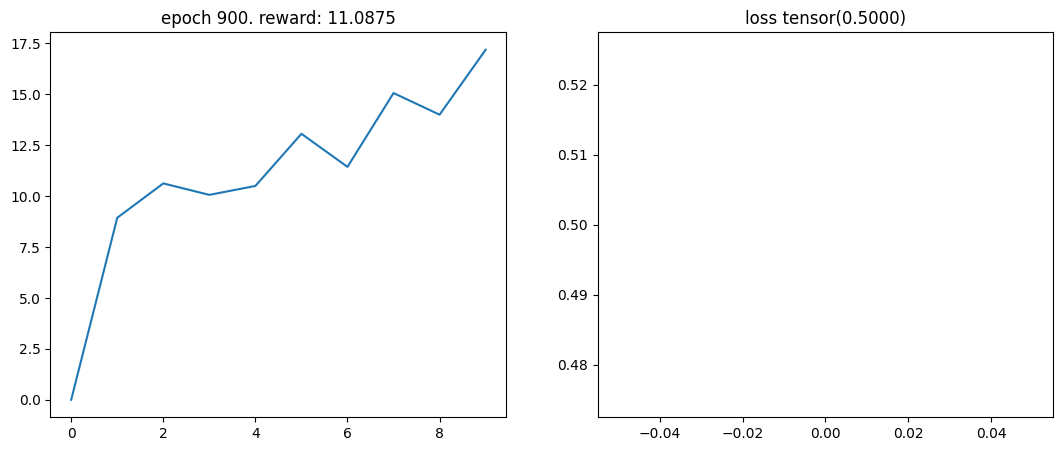

In [21]:
state = envs.reset()
state = torch.FloatTensor(np.float32(state))

rollout.states[0].copy_(state)

episode_rewards = torch.zeros(num_envs, 1)
final_rewards   = torch.zeros(num_envs, 1)

for i_update in range(num_frames):

    for step in range(num_steps):
        action = actor_critic.act(Variable(state))

        next_state, reward, done, _ = envs.step(action.squeeze(1).cpu().data.numpy())

        reward = torch.FloatTensor(reward).unsqueeze(1)
        episode_rewards += reward
        masks = torch.FloatTensor(1-np.array(done)).unsqueeze(1)
        final_rewards *= masks
        final_rewards += (1-masks) * episode_rewards
        episode_rewards *= masks

        if USE_CUDA:
            masks = masks.cuda()

        state = torch.FloatTensor(np.float32(next_state))
        rollout.insert(step, state, action.data, reward, masks)


    _, next_value = actor_critic(Variable(rollout.states[-1], volatile=True))
    next_value = next_value.data

    returns = rollout.compute_returns(next_value, gamma)

    logit, action_log_probs, values, entropy = actor_critic.evaluate_actions(
        Variable(rollout.states[:-1]).view(-1, *state_shape),
        Variable(rollout.actions).view(-1, 1)
    )

    values = values.view(num_steps, num_envs, 1)
    action_log_probs = action_log_probs.view(num_steps, num_envs, 1)
    advantages = Variable(returns) - values

    value_loss = advantages.pow(2).mean()
    action_loss = -(Variable(advantages.data) * action_log_probs).mean()

    optimizer.zero_grad()
    loss = value_loss * value_loss_coef + action_loss - entropy * entropy_coef
    loss=loss.unsqueeze(0)
    loss.backward()
    nn.utils.clip_grad_norm(actor_critic.parameters(), max_grad_norm)
    optimizer.step()

    if i_update % 100 == 0:
        all_rewards.append(final_rewards.mean())
        all_losses.append(loss.data[0])

        clear_output(True)
        plt.figure(figsize=(20,5))
        plt.subplot(131)
        plt.title('epoch %s. reward: %s' % (i_update, np.mean(all_rewards[-10:])))
        plt.plot(all_rewards)
        plt.subplot(132)
        plt.title('loss %s' % all_losses[-1])
        #plt.plot(all_losses)
        # Convert the CUDA tensor to a NumPy array
        numpy_all_losses = all_losses[-1].cpu().numpy()

        # Plot the NumPy array
        plt.plot(numpy_all_losses)
        plt.show()

    rollout.after_update()

In [22]:
torch.save(actor_critic.state_dict(), "actor_critic_" + mode)

In [23]:
import time

def displayImage(image, step, reward):
    clear_output(True)
    s = "step: " + str(step) + " reward: " + str(reward)
    plt.figure(figsize=(10,3))
    plt.title(s)
    plt.imshow(image)
    plt.show()
    time.sleep(0.1)

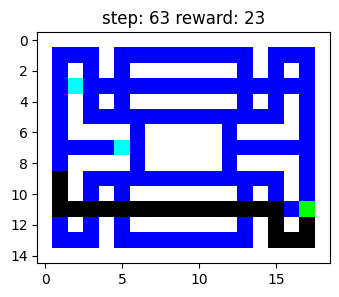

In [24]:
env = MiniPacman(mode, 1000)

done = False
state = env.reset()
total_reward = 0
step   = 1


while not done:
    current_state = torch.FloatTensor(state).unsqueeze(0)
    if USE_CUDA:
        current_state = current_state.cuda()

    action = actor_critic.act(Variable(current_state))

    next_state, reward, done, _ = env.step(action.data[0, 0])
    total_reward += reward
    state = next_state

    image = torch.FloatTensor(state).permute(1, 2, 0).cpu().numpy()
    displayImage(image, step, total_reward)
    step += 1

# Training the Environment Model
The Environment model is passed the current state, action (using the actor critic model) and is used to predict the next state (as an image) and the associated reward. We compare this to the ground truth by simultaneously running the actor critic model.

In [34]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F



In [35]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

In [37]:
#7 different pixels in MiniPacman
pixels = (
    (0.0, 1.0, 1.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 1.0),
    (1.0, 1.0, 0.0),
    (0.0, 0.0, 0.0),
    (1.0, 0.0, 0.0),
)
pixel_to_categorical = {pix:i for i, pix in enumerate(pixels)}
num_pixels = len(pixels)

#For each mode in MiniPacman there are different rewards
mode_rewards = {
    "regular": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "avoid":   [0.1, -0.1, -5, -10, -20],
    "hunt":    [0, 1, 10, -20],
    "ambush":  [0, -0.1, 10, -20],
    "rush":    [0, -0.1, 9.9]
}
reward_to_categorical = {mode: {reward:i for i, reward in enumerate(mode_rewards[mode])} for mode in mode_rewards.keys()}

In [38]:
def pix_to_target(next_states):
    target = []
    for pixel in next_states.transpose(0, 2, 3, 1).reshape(-1, 3):
        target.append(pixel_to_categorical[tuple([np.ceil(pixel[0]), np.ceil(pixel[1]), np.ceil(pixel[2])])])
    return target

def target_to_pix(imagined_states):
    pixels = []
    to_pixel = {value: key for key, value in pixel_to_categorical.items()}
    for target in imagined_states:
        pixels.append(list(to_pixel[target]))
    return np.array(pixels)

def rewards_to_target(mode, rewards):
    target = []
    for reward in rewards:
        target.append(reward_to_categorical[mode][reward])
    return target

def plot(frame_idx, rewards, losses):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('loss %s' % losses[-1])
    plt.plot(losses)
    plt.show()

def displayImage(image, step, reward):
    s = str(step) + " " + str(reward)
    plt.title(s)
    plt.imshow(image)
    plt.show()

In [39]:
class BasicBlock(nn.Module):
    def __init__(self, in_shape, n1, n2, n3):
        super(BasicBlock, self).__init__()

        self.in_shape = in_shape
        self.n1 = n1
        self.n2 = n2
        self.n3 = n3

        self.maxpool = nn.MaxPool2d(kernel_size=in_shape[1:])
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_shape[0] * 2, n1, kernel_size=1, stride=2, padding=6),
            nn.ReLU(),
            nn.Conv2d(n1, n1, kernel_size=10, stride=1, padding=(5, 6)),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_shape[0] * 2, n2, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(n2, n2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(n1 + n2,  n3, kernel_size=1),
            nn.ReLU()
        )

    def forward(self, inputs):
        x = self.pool_and_inject(inputs)
        x = torch.cat([self.conv1(x), self.conv2(x)], 1)
        x = self.conv3(x)
        x = torch.cat([x, inputs], 1)
        return x

    def pool_and_inject(self, x):
        pooled     = self.maxpool(x)
        tiled      = pooled.expand((x.size(0),) + self.in_shape)
        out        = torch.cat([tiled, x], 1)
        return out

In [40]:

class EnvModel(nn.Module):
    def __init__(self, in_shape, num_pixels, num_rewards):
        super(EnvModel, self).__init__()

        width  = in_shape[1]
        height = in_shape[2]

        self.conv = nn.Sequential(
            nn.Conv2d(8, 64, kernel_size=1),
            nn.ReLU()
        )

        self.basic_block1 = BasicBlock((64, width, height), 16, 32, 64)
        self.basic_block2 = BasicBlock((128, width, height), 16, 32, 64)

        self.image_conv = nn.Sequential(
            nn.Conv2d(192, 256, kernel_size=1),
            nn.ReLU()
        )
        self.image_fc = nn.Linear(256, num_pixels)

        self.reward_conv = nn.Sequential(
            nn.Conv2d(192, 64, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=1),
            nn.ReLU()
        )
        self.reward_fc    = nn.Linear(64 * width * height, num_rewards)

    def forward(self, inputs):
        batch_size = inputs.size(0)
        print(inputs.shape)
        x = self.conv(inputs)
        x = self.basic_block1(x)
        x = self.basic_block2(x)

        image = self.image_conv(x)
        image = image.permute(0, 2, 3, 1).contiguous().view(-1, 256)
        image = self.image_fc(image)

        reward = self.reward_conv(x)
        reward = reward.view(batch_size, -1)
        reward = self.reward_fc(reward)

        return image, reward

In [41]:
mode = "regular"
num_envs = 16

def make_env():
    def _thunk():
        env = MiniPacman(mode, 1000)
        return env

    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)

state_shape = envs.observation_space.shape
num_actions = envs.action_space.n

In [42]:
env_model    = EnvModel(envs.observation_space.shape, num_pixels, len(mode_rewards["regular"]))
actor_critic = ActorCritic(envs.observation_space.shape, envs.action_space.n)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(env_model.parameters())

if USE_CUDA:
    env_model    = env_model.cuda()
    actor_critic = actor_critic.cuda()

In [43]:

actor_critic.load_state_dict(torch.load("actor_critic_" + mode))
def get_action(state):
    if state.ndim == 4:
        state = torch.FloatTensor(np.float32(state))
    else:
        state = torch.FloatTensor(np.float32(state)).unsqueeze(0)

    action = actor_critic.act(Variable(state, volatile=True))
    action = action.data.cpu().squeeze(1).numpy()
    return action
def play_games(envs, frames):
    states = envs.reset()

    for frame_idx in range(frames):
        actions = get_action(states)
        next_states, rewards, dones, _ = envs.step(actions)

        yield frame_idx, states, actions, rewards, next_states, dones

        states = next_states

This is the training loop, as you can see we pass the current state concantenated with one hot encoded action to the model. The output of the model is an image of the next state and the reward. This is compared to the target, reward to train the model-

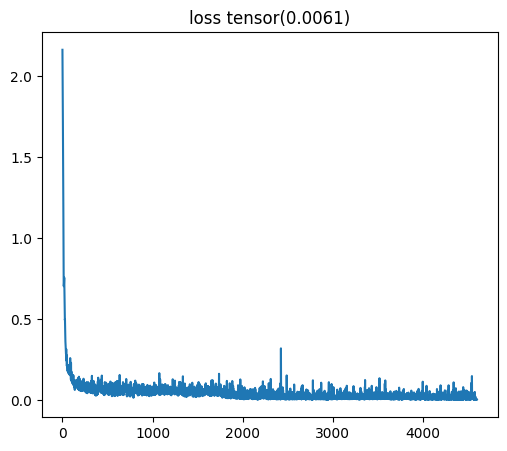

torch.Size([16, 8, 15, 19])
torch.Size([16, 8, 15, 19])
torch.Size([16, 8, 15, 19])
torch.Size([16, 8, 15, 19])
torch.Size([16, 8, 15, 19])
torch.Size([16, 8, 15, 19])
torch.Size([16, 8, 15, 19])
torch.Size([16, 8, 15, 19])


In [ ]:

reward_coef = 0.1
num_updates = 5000

losses = []
all_rewards = []

for frame_idx, states, actions, rewards, next_states, dones in play_games(envs, num_updates):
    states      = torch.FloatTensor(states)
    actions     = torch.LongTensor(actions)

    batch_size = states.size(0)

    onehot_actions = torch.zeros(batch_size, num_actions, *state_shape[1:])
    onehot_actions[range(batch_size), actions] = 1
    inputs = Variable(torch.cat([states, onehot_actions], 1))

    if USE_CUDA:
        inputs = inputs.cuda()

    imagined_state, imagined_reward = env_model(inputs)

    target_state = pix_to_target(next_states)
    target_state = Variable(torch.LongTensor(target_state))

    target_reward = rewards_to_target(mode, rewards)
    target_reward = Variable(torch.LongTensor(target_reward))

    optimizer.zero_grad()
    image_loss  = criterion(imagined_state, target_state)
    reward_loss = criterion(imagined_reward, target_reward)
    loss = image_loss + reward_coef * reward_loss
    loss.backward()
    loss=loss.unsqueeze(0)
    loss=loss.cpu()
    optimizer.step()

    losses.append(loss.data[0])
    all_rewards.append(np.mean(rewards))
    if frame_idx % 10 == 0:
        plot(frame_idx, all_rewards,losses)

In [56]:
torch.save(env_model.state_dict(), "env_model_" + mode)

Here you can see the comparision of the imagined state to the ground truth after training the model sufficiently

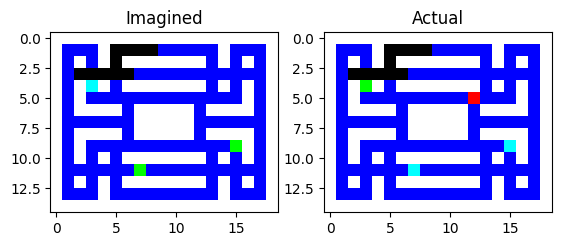

In [57]:
import time

env = MiniPacman(mode, 1000)
batch_size = 1

done = False
state = env.reset()
iss = []
ss  = []

steps = 0

while not done:
    steps += 1
    actions = get_action(state)
    onehot_actions = torch.zeros(batch_size, num_actions, *state_shape[1:])
    onehot_actions[range(batch_size), actions] = 1
    state = torch.FloatTensor(state).unsqueeze(0)

    inputs = Variable(torch.cat([state, onehot_actions], 1))
    if USE_CUDA:
        inputs = inputs.cuda()

    imagined_state, imagined_reward = env_model(inputs)
    imagined_state = F.softmax(imagined_state)
    iss.append(imagined_state)

    next_state, reward, done, _ = env.step(actions[0])
    ss.append(state)
    state = next_state

    imagined_image = target_to_pix(imagined_state.view(batch_size, -1, len(pixels))[0].max(1)[1].data.cpu().numpy())
    imagined_image = imagined_image.reshape(15, 19, 3)
    state_image = torch.FloatTensor(next_state).permute(1, 2, 0).cpu().numpy()

    clear_output()
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.title("Imagined")
    plt.imshow(imagined_image)
    plt.subplot(132)
    plt.title("Actual")
    plt.imshow(state_image)
    plt.show()
    time.sleep(0.3)

    if steps > 30:
        break

# Imagination Augmented Agent
This is the implementation of the original imagination augmented agent as given in the paper. It uses the above environment model in its imagination core to generate imagined state, rewards. Note that the model takes a lot of time and resource to train sufficiently

In [58]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.autograd as autograd

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

In [59]:
pixels = (
    (0.0, 1.0, 0.0),
    (0.0, 1.0, 1.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 1.0),
    (1.0, 1.0, 0.0),
    (0.0, 0.0, 0.0),
    (1.0, 0.0, 0.0)
)
pixel_to_onehot = {pix:i for i, pix in enumerate(pixels)}
num_pixels = len(pixels)

task_rewards = {
    "regular": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "avoid":   [0.1, -0.1, -5, -10, -20],
    "hunt":    [0, 1, 10, -20],
    "ambush":  [0, -0.1, 10, -20],
    "rush":    [0, -0.1, 9.9]
}
reward_to_onehot = {mode: {reward:i for i, reward in enumerate(task_rewards[mode])} for mode in task_rewards.keys()}

def pix_to_target(next_states):
    target = []
    for pixel in next_states.transpose(0, 2, 3, 1).reshape(-1, 3):
        target.append(pixel_to_onehot[tuple([np.round(pixel[0]), np.round(pixel[1]), np.round(pixel[2])])])
    return target

def target_to_pix(imagined_states):
    pixels = []
    to_pixel = {value: key for key, value in pixel_to_onehot.items()}
    for target in imagined_states:
        #print(target)
        pixels.append(list(to_pixel[target]))
    return np.array(pixels)

def rewards_to_target(mode, rewards):
    target = []
    for reward in rewards:
        target.append(reward_to_onehot[mode][reward])
    return target

def displayImage(image, step, reward):
    s = str(step) + " " + str(reward)
    plt.title(s)
    plt.imshow(image)
    plt.show()



In [60]:
mode = "regular"
num_envs = 16

def make_env():
    def _thunk():
        env = MiniPacman(mode, 1000)
        return env

    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)

state_shape = envs.observation_space.shape
num_actions = envs.action_space.n
num_rewards = len(task_rewards[mode])

In [61]:
class RolloutEncoder(nn.Module):
    def __init__(self, in_shape, num_rewards, hidden_size):
        super(RolloutEncoder, self).__init__()

        self.in_shape = in_shape

        self.features = nn.Sequential(
            nn.Conv2d(in_shape[0], 16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=2),
            nn.ReLU(),
        )

        self.gru = nn.GRU(self.feature_size() + num_rewards, hidden_size)

    def forward(self, state, reward):
        num_steps  = state.size(0)
        batch_size = state.size(1)

        state = state.view(-1, *self.in_shape)
        state = self.features(state)
        state = state.view(num_steps, batch_size, -1)
        rnn_input = torch.cat([state, reward], 2)
        _, hidden = self.gru(rnn_input)
        return hidden.squeeze(0)


    def feature_size(self):
        return self.features(autograd.Variable(torch.zeros(1, *self.in_shape))).view(1, -1).size(1)

In [62]:
class I2A(OnPolicy):
    def __init__(self, in_shape, num_actions, num_rewards, hidden_size, imagination, full_rollout=True):
        super(I2A, self).__init__()

        self.in_shape      = in_shape
        self.num_actions   = num_actions
        self.num_rewards   = num_rewards

        self.imagination = imagination

        self.features = nn.Sequential(
            nn.Conv2d(in_shape[0], 16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=2),
            nn.ReLU(),
        )

        self.encoder = RolloutEncoder(in_shape, num_rewards, hidden_size)

        if full_rollout:
            self.fc = nn.Sequential(
                nn.Linear(self.feature_size() + num_actions * hidden_size, 256),
                nn.ReLU(),
            )
        else:
            self.fc = nn.Sequential(
                nn.Linear(self.feature_size() + hidden_size, 256),
                nn.ReLU(),
            )

        self.critic  = nn.Linear(256, 1)
        self.actor   = nn.Linear(256, num_actions)

    def forward(self, state):
        batch_size = state.size(0)

        imagined_state, imagined_reward = self.imagination(state.data)
        hidden = self.encoder(Variable(imagined_state), Variable(imagined_reward))
        hidden = hidden.view(batch_size, -1)

        state = self.features(state)
        state = state.view(state.size(0), -1)

        x = torch.cat([state, hidden], 1)
        x = self.fc(x)

        logit = self.actor(x)
        value = self.critic(x)

        return logit, value

    def feature_size(self):
        return self.features(autograd.Variable(torch.zeros(1, *self.in_shape))).view(1, -1).size(1)

In [63]:
class ImaginationCore(object):
    def __init__(self, num_rolouts, in_shape, num_actions, num_rewards, env_model, distil_policy, full_rollout=True):
        self.num_rolouts  = num_rolouts
        self.in_shape      = in_shape
        self.num_actions   = num_actions
        self.num_rewards   = num_rewards
        self.env_model     = env_model
        self.distil_policy = distil_policy
        self.full_rollout  = full_rollout

    def __call__(self, state):
        state      = state.cpu()
        batch_size = state.size(0)

        rollout_states  = []
        rollout_rewards = []

        if self.full_rollout:
            state = state.unsqueeze(0).repeat(self.num_actions, 1, 1, 1, 1).view(-1, *self.in_shape)
            action = torch.LongTensor([[i] for i in range(self.num_actions)]*batch_size)
            action = action.view(-1)
            rollout_batch_size = batch_size * self.num_actions
        else:
            action = self.distil_policy.act(Variable(state, volatile=True))
            action = action.data.cpu()
            rollout_batch_size = batch_size

        for step in range(self.num_rolouts):
            onehot_action = torch.zeros(rollout_batch_size, self.num_actions, *self.in_shape[1:])
            onehot_action[range(rollout_batch_size), action] = 1
            inputs = torch.cat([state, onehot_action], 1)

            imagined_state, imagined_reward = self.env_model(Variable(inputs, volatile=True))

            imagined_state  = F.softmax(imagined_state).max(1)[1].data.cpu()
            #print(type(imagined_state))
            imagined_reward = F.softmax(imagined_reward).max(1)[1].data.cpu()

            imagined_state = target_to_pix(imagined_state.numpy())
            imagined_state = torch.FloatTensor(imagined_state).view(rollout_batch_size, *self.in_shape)

            onehot_reward = torch.zeros(rollout_batch_size, self.num_rewards)
            onehot_reward[range(rollout_batch_size), imagined_reward] = 1

            rollout_states.append(imagined_state.unsqueeze(0))
            rollout_rewards.append(onehot_reward.unsqueeze(0))

            state  = imagined_state
            action = self.distil_policy.act(Variable(state, volatile=True))
            action = action.data.cpu()

        return torch.cat(rollout_states), torch.cat(rollout_rewards)

In [64]:
full_rollout = True

In [65]:
env_model     = EnvModel(envs.observation_space.shape, num_pixels, num_rewards)
env_model.load_state_dict(torch.load("env_model_" + mode))

distil_policy = ActorCritic(envs.observation_space.shape, envs.action_space.n)
distil_optimizer = optim.Adam(distil_policy.parameters())

imagination = ImaginationCore(1, state_shape, num_actions, num_rewards, env_model, distil_policy, full_rollout=full_rollout)

actor_critic = I2A(state_shape, num_actions, num_rewards, 256, imagination, full_rollout=full_rollout)
#rmsprop hyperparams:
lr    = 7e-4
eps   = 1e-5
alpha = 0.99
optimizer = optim.RMSprop(actor_critic.parameters(), lr, eps=eps, alpha=alpha)


if USE_CUDA:
    env_model     = env_model.cuda()
    distil_policy = distil_policy.cuda()
    actor_critic  = actor_critic.cuda()

In [67]:
gamma = 0.99
entropy_coef = 0.01
value_loss_coef = 0.5
max_grad_norm = 0.5
num_steps = 5
num_frames = int(10e5)

rollout = RolloutStorage(num_steps, num_envs, envs.observation_space.shape)
#rollout.cuda()

all_rewards = []
all_losses  = []

In [ ]:
state = envs.reset()
current_state = torch.FloatTensor(np.float32(state))

rollout.states[0].copy_(current_state)

episode_rewards = torch.zeros(num_envs, 1)
final_rewards   = torch.zeros(num_envs, 1)

for i_update in range(num_frames):

    for step in range(num_steps):
        if USE_CUDA:
            current_state = current_state.cuda()
        action = actor_critic.act(Variable(current_state))

        next_state, reward, done, _ = envs.step(action.squeeze(1).cpu().data.numpy())

        reward = torch.FloatTensor(reward).unsqueeze(1)
        episode_rewards += reward
        masks = torch.FloatTensor(1-np.array(done)).unsqueeze(1)
        final_rewards *= masks
        final_rewards += (1-masks) * episode_rewards
        episode_rewards *= masks

        if USE_CUDA:
            masks = masks.cuda()

        current_state = torch.FloatTensor(np.float32(next_state))
        rollout.insert(step, current_state, action.data, reward, masks)


    _, next_value = actor_critic(Variable(rollout.states[-1], volatile=True))
    next_value = next_value.data

    returns = rollout.compute_returns(next_value, gamma)

    logit, action_log_probs, values, entropy = actor_critic.evaluate_actions(
        Variable(rollout.states[:-1]).view(-1, *state_shape),
        Variable(rollout.actions).view(-1, 1)
    )

    distil_logit, _, _, _ = distil_policy.evaluate_actions(
        Variable(rollout.states[:-1]).view(-1, *state_shape),
        Variable(rollout.actions).view(-1, 1)
    )

    distil_loss = 0.01 * (F.softmax(logit).detach() * F.log_softmax(distil_logit)).sum(1).mean()

    values = values.view(num_steps, num_envs, 1)
    action_log_probs = action_log_probs.view(num_steps, num_envs, 1)
    advantages = Variable(returns) - values

    value_loss = advantages.pow(2).mean()
    action_loss = -(Variable(advantages.data) * action_log_probs).mean()

    optimizer.zero_grad()
    loss = value_loss * value_loss_coef + action_loss - entropy * entropy_coef
    loss.backward()
    loss=loss.unsqueeze(0)
    loss=loss.cpu()
    nn.utils.clip_grad_norm(actor_critic.parameters(), max_grad_norm)
    optimizer.step()

    distil_optimizer.zero_grad()
    distil_loss.backward()
    optimizer.step()

    if i_update % 100 == 0:
        all_rewards.append(final_rewards.mean())
        all_losses.append(loss.data[0])
        all_losses2 = torch.stack([loss.cpu() for loss in all_losses]).cpu()
        clear_output(True)
        plt.figure(figsize=(20,5))
        plt.subplot(131)
        plt.title('epoch %s. reward: %s' % (i_update, np.mean(all_rewards[-10:])))
        plt.plot(all_rewards)
        plt.subplot(132)
        plt.title('loss %s' % all_losses[-1])
        plt.plot(all_losses2)
        plt.show()

    rollout.after_update()

In [70]:
import torch
torch.save(actor_critic.state_dict(), "i2a_" + mode)

# Deep State Space Models
The autoregressive models can be computationally expensive as they need to generate each previous state to generate the next state. An alternate model we found was the stochastic state space model. Here we assume that the next state is only dependent on the current state (memoryless states).
This implementation is based on the paper- https://arxiv.org/pdf/1802.03006 (Learning and Querying Generative Models for RL)
We also took reference from- https://github.com/davidsandberg/rl_ssms?tab=readme-ov-file which implements the model for a bouncing ball environment.

We have edited the model to have the same type of input output as the original model, but a key difference is that this model does not need to calculate the exact state of the environment in each step but relies on learning from latent states.

In [71]:
import torch.nn.functional as F


class EnvModel2(nn.Module):
    def __init__(self, state_dim, action_dim, horizon, nrof_init_time_steps=1, nrof_time_steps=1, nrof_free_nats=0.0):
        super(EnvModel2, self).__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.horizon = horizon
        self.nrof_init_time_steps = nrof_init_time_steps
        self.nrof_time_steps = nrof_time_steps
        self.nrof_free_nats = nrof_free_nats

        # Encoder for the current state image
        self.state_encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1280, state_dim)
        )

        # Decoder for the next state image
        self.state_decoder = nn.Sequential(
            nn.Linear(state_dim, 1280),
            nn.ReLU(),
            nn.Unflatten(1, (64, 4, 5)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

        # Transition model
        self.transition_model = nn.Sequential(
            nn.Linear(state_dim + action_dim, 256),
            nn.ReLU(),
            nn.Linear(256, state_dim * 2)
        )

        # Observation model
        self.observation_model = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.ReLU(),
            nn.Linear(256, state_dim * 2)
        )

        # Imagination model
        self.imagination_model = nn.GRUCell(state_dim + action_dim, state_dim)

        # Reward model
        self.reward_model = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, obs, actions):
        batch_size = obs.shape[0]
        imagined_actions=actions
        # Encode observations
        encoded_obs = self.state_encoder(obs)
        #print(encoded_obs.shape)
        # Initialize state
        initial_state = encoded_obs.view(batch_size, self.nrof_init_time_steps, self.state_dim)
        state = initial_state[:, -1, :]

        # Convert actions to one-hot
        onehot_actions = F.one_hot(actions.long(), num_classes=self.action_dim).float()
        onehot_imagined_actions = F.one_hot(imagined_actions.long(), num_classes=self.action_dim).float()

        obs_hat_list = []
        next_state_list = []
        reward_list = []

        for t in range(self.nrof_time_steps):
            # Compute prior statistics
            #print(onehot_actions[:, :].shape)
            mu, sigma = torch.split(self.transition_model(torch.cat([state, onehot_actions], dim=1)), self.state_dim, dim=-1)

            # Compute posterior statistics
            mu_hat, sigma_hat = torch.split(self.observation_model(state), self.state_dim, dim=-1)

            # Sample from z using the reparametrization trick
            eps = torch.randn_like(sigma)
            z = mu + sigma * eps

            # Calculate next state
            z_trans = z
            input_tensor = torch.cat([onehot_imagined_actions, state], dim=1)
            next_state = self.imagination_model(input_tensor,z_trans)
            #print("next state",next_state.shape)
            next_state_list.append(next_state)

            # Calculate observation
            z_obs = z.unsqueeze(1)
            next_state_hat=self.state_decoder(next_state)
            #print(next_state_hat.shape)
            obs_hat = torch.sigmoid(self.state_encoder(next_state_hat))
            obs_hat_list.append(obs_hat)

            # Calculate reward
            reward = self.reward_model(next_state)
            reward_list.append(reward)

            state = next_state.squeeze(1)

        next_state = torch.stack(next_state_list, dim=-1)
        #print("heyho",next_state.shape)
        obs_hat = torch.stack(obs_hat_list, dim=-1)[:,:,0]
        #print("dimsum",obs_hat.shape)
        reward = torch.stack(reward_list, dim=-1)[:,:,0]

        # Decode next state to image
        next_state_img = self.state_decoder(next_state[:,:,0])

        # Calculate loss
        reconstruction_loss = F.binary_cross_entropy(obs_hat[:, self.nrof_init_time_steps:], torch.clamp(encoded_obs[:, self.nrof_init_time_steps:], 0, 1))

        # Calculate regularization loss
        f = self.nrof_free_nats * torch.prod(torch.tensor(mu.shape[2:]))
        regularization_loss = torch.maximum(f, torch.sum(0.5 * (mu - mu_hat) ** 2 / sigma_hat ** 2 + 0.5 * sigma_hat ** 2, dim=-1))

        return next_state_img, reward, obs_hat, reconstruction_loss, regularization_loss

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.distributions import Normal
USE_CUDA = torch.cuda.is_available()

mode = "regular"
num_envs = 16

reward_coef = 0.1
num_updates = 5000
def make_env():
    def _thunk():
        env = MiniPacman(mode, 1000)
        return env
    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)
state_shape = envs.observation_space.shape
num_actions = envs.action_space.n
state_dim = 64
action_dim = num_actions
horizon = 10

env_model = EnvModel2(state_dim, action_dim, horizon)
actor_critic = ActorCritic(state_shape, action_dim)
optimizer = optim.Adam(env_model.parameters(), lr=0.001)

if USE_CUDA:
    env_model = env_model.cuda()
    actor_critic = actor_critic.cuda()

actor_critic.load_state_dict(torch.load("actor_critic_" + mode))
def play_games(envs, frames):
    states = envs.reset()
    for frame_idx in range(frames):
        actions = get_action(states)
        next_states, rewards, dones, _ = envs.step(actions)
        yield frame_idx, states, actions, rewards, next_states, dones
        states = next_states

def get_action(state):
    if state.ndim == 4:
        state = torch.FloatTensor(np.float32(state))
    else:
        state = torch.FloatTensor(np.float32(state)).unsqueeze(0)
    if USE_CUDA:
      state=state.cuda()
    action = actor_critic.act(Variable(state, volatile=True))
    action = action.data.cpu().squeeze(1).numpy()

    return action

optimizer = optim.Adam(env_model.parameters(), lr=0.001)

for frame_idx, states, actions, rewards, next_states, dones in play_games(envs, num_updates):
    states = torch.FloatTensor(states)
    actions = torch.LongTensor(actions)
    #imagined_actions = torch.LongTensor(actions)  # Assuming no separate imagined actions
    batch_size = states.size(0)

    if USE_CUDA:
        states = states.cuda()
        actions = actions.cuda()
        imagined_actions = imagined_actions.cuda()

    next_state_img, reward_pred, obs_hat, recon_loss, reg_loss = env_model(states, actions)
    reward_pred=reward_pred.cpu()
    optimizer.zero_grad()
    loss = recon_loss + reward_coef * F.mse_loss(reward_pred.squeeze(), torch.FloatTensor(rewards).unsqueeze(1)) + reg_loss
    loss = loss.mean()
    optimizer.step()

    if frame_idx % 10 == 0:
        print(f"Frame: {frame_idx}, Loss: {loss.item()}")

In [73]:
torch.save(env_model.state_dict(), "env_model2_" + mode)

# VAE as an Environment Model
This is an implementation of Variational Autoencoders as an environment model. They are more computationally effecient that both of the previous two models.They also use latent states to learn about the actual state without directly computing the state.
Inspiration for this was drawn from- https://worldmodels.github.io/

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal

class PacmanVAE(nn.Module):
    def __init__(self, state_dim, action_dim, horizon):
        super(PacmanVAE, self).__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.horizon = horizon

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(8, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128 * 4 * 3, 512),  # Adjusted input size
            nn.ReLU(),
            nn.Linear(512, state_dim * 2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(state_dim + action_dim, 64 * 4 * 5),  # Adjusted input size
            nn.ReLU(),
            nn.Unflatten(1, (64, 4, 5)),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

        # Reward model
        self.reward_model = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, state, action):
        batch_size = state.size(0)

        # Encode state
        mu, logvar = torch.split(self.encoder(torch.cat([state, action], dim=1)), self.state_dim, dim=-1)
        z = self.reparameterize(mu, logvar)

        # Decode next state
        actions1 = action[:, :, 0, 0]
        next_state = self.decoder(torch.cat([z, actions1], dim=-1))
        next_state = next_state[:, :, :15, :19]
        # Compute reward
        reward = self.reward_model(z)

        return next_state, reward, mu, logvar

In [ ]:
import torch
import torch.optim as optim
from torch.autograd import Variable

USE_CUDA = torch.cuda.is_available()

mode = "regular"
num_envs = 16

def make_env():
    def _thunk():
        env = MiniPacman(mode, 1000)
        return env
    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)
state_shape = envs.observation_space.shape
num_actions = envs.action_space.n
state_dim = 64
action_dim = num_actions
horizon = 10

vae_model = PacmanVAE(state_dim, action_dim, horizon)
optimizer = optim.Adam(vae_model.parameters(), lr=0.001)
actor_critic = ActorCritic(envs.observation_space.shape, envs.action_space.n)

if USE_CUDA:
    vae_model = vae_model.cuda()
    actor_critic = actor_critic.cuda()

actor_critic.load_state_dict(torch.load("actor_critic_" + mode))
def get_action(state):
    if state.ndim == 4:
        state = torch.FloatTensor(np.float32(state))
    else:
        state = torch.FloatTensor(np.float32(state)).unsqueeze(0)
    if USE_CUDA:
      state=state.cuda()
    '''if state.ndim!=4:
      state=state.unsqueeze(0)'''

    action = actor_critic.act(Variable(state, volatile=True))
    action = action.data.cpu().squeeze(1).numpy()
    return action


def play_games(envs, frames):
    states = envs.reset()

    for frame_idx in range(frames):
        action = get_action(states)
        next_states, rewards, dones, _ = envs.step(action)
        yield frame_idx, state.cpu(), action, rewards, next_states, dones
        states = next_states

num_updates = 5000
beta = 1.0  # Weight for the KL divergence term

for frame_idx, state, action, rewards, next_states, dones in play_games(envs, num_updates):
    state = torch.FloatTensor(state)
    next_state = torch.FloatTensor(next_states)
    action     = torch.LongTensor(action)
    batch_size = state.size(0)

    onehot_actions = torch.zeros(batch_size, num_actions, *state_shape[1:])
    onehot_actions[range(batch_size), action] = 1

    if USE_CUDA:
        state = state.cuda()
        onehot_actions = onehot_actions.cuda()
        next_state = next_state.cuda()

    next_state_pred, reward_pred, mu, logvar = vae_model(state, onehot_actions)
    reward_pred=reward_pred.cpu()
    #print(next_state_pred.shape)
    #print(next_state.shape)
    recon_loss = F.mse_loss(next_state_pred, next_state, reduction='sum')
    reward_loss = F.mse_loss(reward_pred.squeeze(), torch.FloatTensor(rewards).unsqueeze(1), reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    loss = recon_loss + reward_loss + beta * kl_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if frame_idx % 100 == 0:
        print(f"Frame: {frame_idx}, Loss: {loss.item()}")

In [ ]:
torch.save(vae_model.state_dict(), "vae_model_" + mode)

# Using I2A with deep state space model
Note- due to time and resource constraint this section is not working as well. Nevertheless I am including it for completeness of the experiment.

In [ ]:
USE_CUDA=False
pixels = (
    (0.0, 1.0, 0.0),
    (0.0, 1.0, 1.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 1.0),
    (1.0, 1.0, 0.0),
    (0.0, 0.0, 0.0),
    (1.0, 0.0, 0.0)
)
pixel_to_onehot = {pix:i for i, pix in enumerate(pixels)}
num_pixels = len(pixels)

task_rewards = {
    "regular": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "avoid":   [0.1, -0.1, -5, -10, -20],
    "hunt":    [0, 1, 10, -20],
    "ambush":  [0, -0.1, 10, -20],
    "rush":    [0, -0.1, 9.9]
}
reward_to_onehot = {mode: {reward:i for i, reward in enumerate(task_rewards[mode])} for mode in task_rewards.keys()}

def pix_to_target(next_states):
    target = []
    for pixel in next_states.transpose(0, 2, 3, 1).reshape(-1, 3):
        target.append(pixel_to_onehot[tuple([np.round(pixel[0]), np.round(pixel[1]), np.round(pixel[2])])])
    return target

def target_to_pix(imagined_states):
    pixels = []
    to_pixel = {value: key for key, value in pixel_to_onehot.items()}
    for target in imagined_states:
        pixels.append(list(to_pixel[target]))
    return np.array(pixels)

def rewards_to_target(mode, rewards):
    target = []
    for reward in rewards:
        target.append(reward_to_onehot[mode][reward])
    return target

def displayImage(image, step, reward):
    s = str(step) + " " + str(reward)
    plt.title(s)
    plt.imshow(image)
    plt.show()

mode = "regular"
num_envs = 16

def make_env():
    def _thunk():
        env = MiniPacman(mode, 1000)
        return env

    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)

state_shape = envs.observation_space.shape
num_actions = envs.action_space.n
num_rewards = len(task_rewards[mode])
full_rollout = True

Here we edit the Imagination core to support the deep state space model. Not much modification was needed except the input output types.

In [ ]:
class ImaginationCore(object):
    def __init__(self, num_rolouts, in_shape, num_actions, num_rewards, env_model, distil_policy, full_rollout=True):
        self.num_rolouts  = num_rolouts
        self.in_shape      = in_shape
        self.num_actions   = num_actions
        self.num_rewards   = num_rewards
        self.env_model     = env_model
        self.distil_policy = distil_policy
        self.full_rollout  = full_rollout

    def __call__(self, state):
        state      = state.cpu()
        batch_size = state.size(0)

        rollout_states  = []
        rollout_rewards = []

        if self.full_rollout:
            state = state.unsqueeze(0).repeat(self.num_actions, 1, 1, 1, 1).view(-1, *self.in_shape)
            action = torch.LongTensor([[i] for i in range(self.num_actions)]*batch_size)
            action = action.view(-1)
            rollout_batch_size = batch_size * self.num_actions
        else:
            action = self.distil_policy.act(Variable(state, volatile=True))
            action = action.data.cpu()
            rollout_batch_size = batch_size

        for step in range(self.num_rolouts):
            onehot_action = torch.zeros(rollout_batch_size, self.num_actions, *self.in_shape[1:])
            onehot_action[range(rollout_batch_size), action] = 1
            inputs = torch.cat([state, onehot_action], 1)

            imagined_state, imagined_reward = self.env_model(state,onehot_action)

            imagined_state  = F.softmax(imagined_state).max(1)[1].data.cpu()
            imagined_reward = F.softmax(imagined_reward).max(1)[1].data.cpu()

            imagined_state = target_to_pix(imagined_state.numpy())
            imagined_state = torch.FloatTensor(imagined_state).view(rollout_batch_size, *self.in_shape)

            onehot_reward = torch.zeros(rollout_batch_size, self.num_rewards)
            onehot_reward[range(rollout_batch_size), imagined_reward] = 1

            rollout_states.append(imagined_state.unsqueeze(0))
            rollout_rewards.append(onehot_reward.unsqueeze(0))

            state  = imagined_state
            action = self.distil_policy.act(Variable(state, volatile=True))
            action = action.data.cpu()

        return torch.cat(rollout_states), torch.cat(rollout_rewards)

In [ ]:
state_dim = 64
action_dim = num_actions
horizon = 10
env_model = EnvModel2(state_dim,action_dim,horizon)
env_model.load_state_dict(torch.load("env_model2_" + mode))

distil_policy = ActorCritic(envs.observation_space.shape, envs.action_space.n)
distil_optimizer = optim.Adam(distil_policy.parameters())

imagination = ImaginationCore(1, state_shape, num_actions, num_rewards, env_model, distil_policy, full_rollout=full_rollout)

actor_critic = I2A(state_shape, num_actions, num_rewards, 256, imagination, full_rollout=full_rollout)
#rmsprop hyperparams:
lr    = 7e-4
eps   = 1e-5
alpha = 0.99
optimizer = optim.RMSprop(actor_critic.parameters(), lr, eps=eps, alpha=alpha)


if USE_CUDA:
    env_model     = env_model.cuda()
    distil_policy = distil_policy.cuda()
    actor_critic  = actor_critic.cuda()

In [ ]:
gamma = 0.99
entropy_coef = 0.01
value_loss_coef = 0.5
max_grad_norm = 0.5
num_steps = 5
num_frames = int(10e5)

rollout = RolloutStorage(num_steps, num_envs, envs.observation_space.shape)
rollout.cuda()

all_rewards = []
all_losses  = []

In [ ]:
state = envs.reset()
current_state = torch.FloatTensor(np.float32(state))

rollout.states[0].copy_(current_state)

episode_rewards = torch.zeros(num_envs, 1)
final_rewards   = torch.zeros(num_envs, 1)

for i_update in range(num_frames):

    for step in range(num_steps):
        if USE_CUDA:
            current_state = current_state.cuda()
        action = actor_critic.act(Variable(current_state))

        next_state, reward, done, _ = envs.step(action.squeeze(1).cpu().data.numpy())

        reward = torch.FloatTensor(reward).unsqueeze(1)
        episode_rewards += reward
        masks = torch.FloatTensor(1-np.array(done)).unsqueeze(1)
        final_rewards *= masks
        final_rewards += (1-masks) * episode_rewards
        episode_rewards *= masks

        if USE_CUDA:
            masks = masks.cuda()

        current_state = torch.FloatTensor(np.float32(next_state))
        rollout.insert(step, current_state, action.data, reward, masks)


    _, next_value = actor_critic(Variable(rollout.states[-1], volatile=True))
    next_value = next_value.data

    returns = rollout.compute_returns(next_value, gamma)

    logit, action_log_probs, values, entropy = actor_critic.evaluate_actions(
        Variable(rollout.states[:-1]).view(-1, *state_shape),
        Variable(rollout.actions).view(-1, 1)
    )

    distil_logit, _, _, _ = distil_policy.evaluate_actions(
        Variable(rollout.states[:-1]).view(-1, *state_shape),
        Variable(rollout.actions).view(-1, 1)
    )

    distil_loss = 0.01 * (F.softmax(logit).detach() * F.log_softmax(distil_logit)).sum(1).mean()

    values = values.view(num_steps, num_envs, 1)
    action_log_probs = action_log_probs.view(num_steps, num_envs, 1)
    advantages = Variable(returns) - values

    value_loss = advantages.pow(2).mean()
    action_loss = -(Variable(advantages.data) * action_log_probs).mean()

    optimizer.zero_grad()
    loss = value_loss * value_loss_coef + action_loss - entropy * entropy_coef
    loss.backward()
    loss=loss.unsqueeze(0)
    loss=loss.cpu()
    nn.utils.clip_grad_norm(actor_critic.parameters(), max_grad_norm)
    optimizer.step()

    distil_optimizer.zero_grad()
    distil_loss.backward()
    optimizer.step()

    if i_update % 100 == 0:
        all_rewards.append(final_rewards.mean())
        all_losses.append(loss.data[0])
        all_losses2 = torch.stack([loss.cpu() for loss in all_losses]).cpu()
        clear_output(True)
        plt.figure(figsize=(20,5))
        plt.subplot(131)
        plt.title('epoch %s. reward: %s' % (i_update, np.mean(all_rewards[-10:])))
        plt.plot(all_rewards)
        plt.subplot(132)
        plt.title('loss %s' % all_losses[-1])
        plt.plot(all_losses2)
        plt.show()

    rollout.after_update()

In [ ]:
import torch
torch.save(actor_critic.state_dict(), "i2a_" + mode)

# I2A with VAE model
Note- due to time and resource constraint this section is not working as well. Nevertheless I am including it for completeness of the experiment.

In [ ]:
USE_CUDA=False
pixels = (
    (0.0, 1.0, 0.0),
    (0.0, 1.0, 1.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 1.0),
    (1.0, 1.0, 0.0),
    (0.0, 0.0, 0.0),
    (1.0, 0.0, 0.0)
)
pixel_to_onehot = {pix:i for i, pix in enumerate(pixels)}
num_pixels = len(pixels)

task_rewards = {
    "regular": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "avoid":   [0.1, -0.1, -5, -10, -20],
    "hunt":    [0, 1, 10, -20],
    "ambush":  [0, -0.1, 10, -20],
    "rush":    [0, -0.1, 9.9]
}
reward_to_onehot = {mode: {reward:i for i, reward in enumerate(task_rewards[mode])} for mode in task_rewards.keys()}

def pix_to_target(next_states):
    target = []
    for pixel in next_states.transpose(0, 2, 3, 1).reshape(-1, 3):
        target.append(pixel_to_onehot[tuple([np.round(pixel[0]), np.round(pixel[1]), np.round(pixel[2])])])
    return target

def target_to_pix(imagined_states):
    pixels = []
    to_pixel = {value: key for key, value in pixel_to_onehot.items()}
    for target in imagined_states:
        print(target)
        pixels.append(list(to_pixel[target]))
    return np.array(pixels)

def rewards_to_target(mode, rewards):
    target = []
    for reward in rewards:
        target.append(reward_to_onehot[mode][reward])
    return target

def displayImage(image, step, reward):
    s = str(step) + " " + str(reward)
    plt.title(s)
    plt.imshow(image)
    plt.show()
mode = "regular"
num_envs = 16

def make_env():
    def _thunk():
        env = MiniPacman(mode, 1000)
        return env

    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)

state_shape = envs.observation_space.shape
num_actions = envs.action_space.n
num_rewards = len(task_rewards[mode])
full_rollout=True
state_dim = 64
action_dim = num_actions
horizon = 10

In [ ]:
class ImaginationCoreVAE(object):
    def __init__(self, num_rolouts, in_shape, num_actions, num_rewards, env_model, distil_policy, full_rollout=True):
        self.num_rolouts  = num_rolouts
        self.in_shape      = in_shape
        self.num_actions   = num_actions
        self.num_rewards   = num_rewards
        self.env_model     = env_model
        self.distil_policy = distil_policy
        self.full_rollout  = full_rollout

    def __call__(self, state):
        state      = state.cpu()
        batch_size = state.size(0)

        rollout_states  = []
        rollout_rewards = []

        if self.full_rollout:
            state = state.unsqueeze(0).repeat(self.num_actions, 1, 1, 1, 1).view(-1, *self.in_shape)
            action = torch.LongTensor([[i] for i in range(self.num_actions)]*batch_size)
            action = action.view(-1)
            rollout_batch_size = batch_size * self.num_actions
        else:
            action = self.distil_policy.act(Variable(state, volatile=True))
            action = action.data.cpu()
            rollout_batch_size = batch_size

        for step in range(self.num_rolouts):
            onehot_action = torch.zeros(rollout_batch_size, self.num_actions, *self.in_shape[1:])
            onehot_action[range(rollout_batch_size), action] = 1
            #inputs = torch.cat([state, onehot_action], 1)

            imagined_state, imagined_reward,_,_ = self.env_model(state,onehot_action)

            #imagined_state  = F.softmax(imagined_state).max(1)[1].data.cpu()
            imagined_reward = F.softmax(imagined_reward).max(1)[1].data.cpu()
            #print(type(imagined_state))
            #imagined_state = target_to_pix(imagined_state.numpy())
            imagined_state = torch.FloatTensor(imagined_state).view(rollout_batch_size, *self.in_shape)

            onehot_reward = torch.zeros(rollout_batch_size, self.num_rewards)
            onehot_reward[range(rollout_batch_size), imagined_reward] = 1

            rollout_states.append(imagined_state.unsqueeze(0))
            rollout_rewards.append(onehot_reward.unsqueeze(0))

            state  = imagined_state
            action = self.distil_policy.act(Variable(state, volatile=True))
            action = action.data.cpu()

        return torch.cat(rollout_states), torch.cat(rollout_rewards)

In [ ]:
env_model     = PacmanVAE(state_dim, action_dim, horizon)
env_model.load_state_dict(torch.load("vae_model_" + mode))

distil_policy = ActorCritic(envs.observation_space.shape, envs.action_space.n)
distil_optimizer = optim.Adam(distil_policy.parameters())

imagination = ImaginationCoreVAE(1, state_shape, num_actions, num_rewards, env_model, distil_policy, full_rollout=full_rollout)

actor_critic = I2A(state_shape, num_actions, num_rewards, 256, imagination, full_rollout=full_rollout)
#rmsprop hyperparams:
lr    = 7e-4
eps   = 1e-5
alpha = 0.99
optimizer = optim.RMSprop(actor_critic.parameters(), lr, eps=eps, alpha=alpha)


if USE_CUDA:
    env_model     = env_model.cuda()
    distil_policy = distil_policy.cuda()
    actor_critic  = actor_critic.cuda()

In [ ]:
gamma = 0.99
entropy_coef = 0.01
value_loss_coef = 0.5
max_grad_norm = 0.5
num_steps = 5
num_frames = int(10e5)

rollout = RolloutStorage(num_steps, num_envs, envs.observation_space.shape)
rollout.cuda()

all_rewards = []
all_losses  = []

In [ ]:
state = envs.reset()
current_state = torch.FloatTensor(np.float32(state))

rollout.states[0].copy_(current_state)

episode_rewards = torch.zeros(num_envs, 1)
final_rewards   = torch.zeros(num_envs, 1)

for i_update in range(num_frames):

    for step in range(num_steps):
        if USE_CUDA:
            current_state = current_state.cuda()
        action = actor_critic.act(Variable(current_state))

        next_state, reward, done, _ = envs.step(action.squeeze(1).cpu().data.numpy())

        reward = torch.FloatTensor(reward).unsqueeze(1)
        episode_rewards += reward
        masks = torch.FloatTensor(1-np.array(done)).unsqueeze(1)
        final_rewards *= masks
        final_rewards += (1-masks) * episode_rewards
        episode_rewards *= masks

        if USE_CUDA:
            masks = masks.cuda()

        current_state = torch.FloatTensor(np.float32(next_state))
        rollout.insert(step, current_state, action.data, reward, masks)


    _, next_value = actor_critic(Variable(rollout.states[-1], volatile=True))
    next_value = next_value.data

    returns = rollout.compute_returns(next_value, gamma)

    logit, action_log_probs, values, entropy = actor_critic.evaluate_actions(
        Variable(rollout.states[:-1]).view(-1, *state_shape),
        Variable(rollout.actions).view(-1, 1)
    )

    distil_logit, _, _, _ = distil_policy.evaluate_actions(
        Variable(rollout.states[:-1]).view(-1, *state_shape),
        Variable(rollout.actions).view(-1, 1)
    )

    distil_loss = 0.01 * (F.softmax(logit).detach() * F.log_softmax(distil_logit)).sum(1).mean()

    values = values.view(num_steps, num_envs, 1)
    action_log_probs = action_log_probs.view(num_steps, num_envs, 1)
    advantages = Variable(returns) - values

    value_loss = advantages.pow(2).mean()
    action_loss = -(Variable(advantages.data) * action_log_probs).mean()

    optimizer.zero_grad()
    loss = value_loss * value_loss_coef + action_loss - entropy * entropy_coef
    loss.backward()
    loss=loss.unsqueeze(0)
    loss=loss.cpu()
    nn.utils.clip_grad_norm(actor_critic.parameters(), max_grad_norm)
    optimizer.step()

    distil_optimizer.zero_grad()
    distil_loss.backward()
    optimizer.step()

    if i_update % 100 == 0:
        all_rewards.append(final_rewards.mean())
        all_losses.append(loss.data[0])
        all_losses2 = torch.stack([loss.cpu() for loss in all_losses]).cpu()
        clear_output(True)
        plt.figure(figsize=(20,5))
        plt.subplot(131)
        plt.title('epoch %s. reward: %s' % (i_update, np.mean(all_rewards[-10:])))
        plt.plot(all_rewards)
        plt.subplot(132)
        plt.title('loss %s' % all_losses[-1])
        plt.plot(all_losses2)
        plt.show()

    rollout.after_update()

# Conclusion
The main focus in designing environment models for the I2A architecture is the fact that it can learn better from imperfect models than perfect environment models. This means that abstract representations of the environment might prove more effecient for the Imagination core of a I2A than directly simulating the environment.